<a href="https://colab.research.google.com/github/Mikolaj-Pytlos/ML24-25/blob/prace-domowe/PD_01_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Mikołaj*** ***Pytlos***

***Primary question***
Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.

***Odpowiedź:*** PCA uwypukla podział na klastry punktów stanowiących dane. Dzieje się tak, dlatego, że wykonując PCA, znajdujemy wektory własne macierzy tych danych, następnie porządkujemy je według wartości własnych od największej do najmniejszej i na końcu wybieramy określoną liczbę wektorów własnych o największych wartościach własnych, aby zrzutować dane na podprzestrzeń rozpiętą przez wybrane wektory. Wynika stąd, że ów rzut będzie rzutem danych na kierunki, wzdłuż których są one najbardziej "rozciągnięte", tzn. wzdłuż tych kierunków różnice między poszczególnymi obserwacjami są największe. PCA pokazuje więc największe różnice między poszczególnymi obserwacjami. A że obserwacje należące do jednego klastra mają być pod każdym względem jak najbardziej do siebie podobne, PCA uwydatnia również najistotniejsze różnice między klastrami.

Analizując wykresy rzutów na podprzestrzenie (x,y,0),(x,0,z), (0,y,z) danych w poniższym zadaniu, widzimy, że porównując po dwie wybrane cechy naszych obserwacji nie sposób uchwycić różnic i podobieństw we wszystkich cechach na raz. Analizując natomiast wykres PCA podział na klastry staje się zrozumiały.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10842  100 10842    0     0  62213      0 --:--:-- --:--:-- --:--:-- 61954
Index(['x', 'y', 'z', 'class'], dtype='object')
x        float64
y        float64
z        float64
class      int64
dtype: object


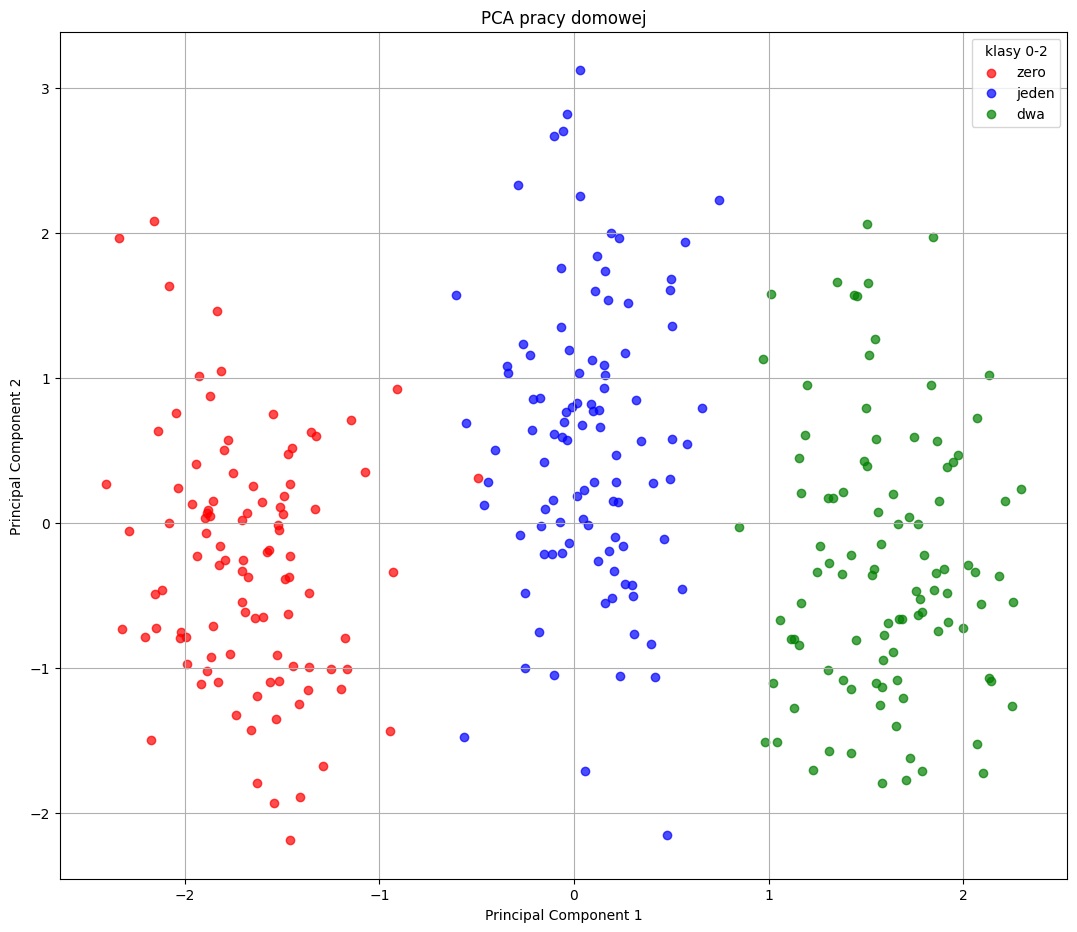

In [ ]:
from typing_extensions import dataclass_transform
import sklearn.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

!curl -LO https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv

data = pd.read_csv('PCA_three_clusters_data.csv')

data

y = data['class']

print(data.columns)
print(data.dtypes)

data = data - np.mean(data, axis=0)
data = data / np.std(data, axis=0)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(13, 11))

plt.scatter(data_pca[y == 0, 0], data_pca[y == 0, 1], label="zero", color='red', alpha=0.7)
plt.scatter(data_pca[y == 1, 0], data_pca[y == 1, 1], label="jeden", color='blue', alpha=0.7)
plt.scatter(data_pca[y == 2, 0], data_pca[y == 2, 1], label="dwa", color='green', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA pracy domowej")
plt.legend(title="klasy 0-2")
plt.grid(True)
plt.show()


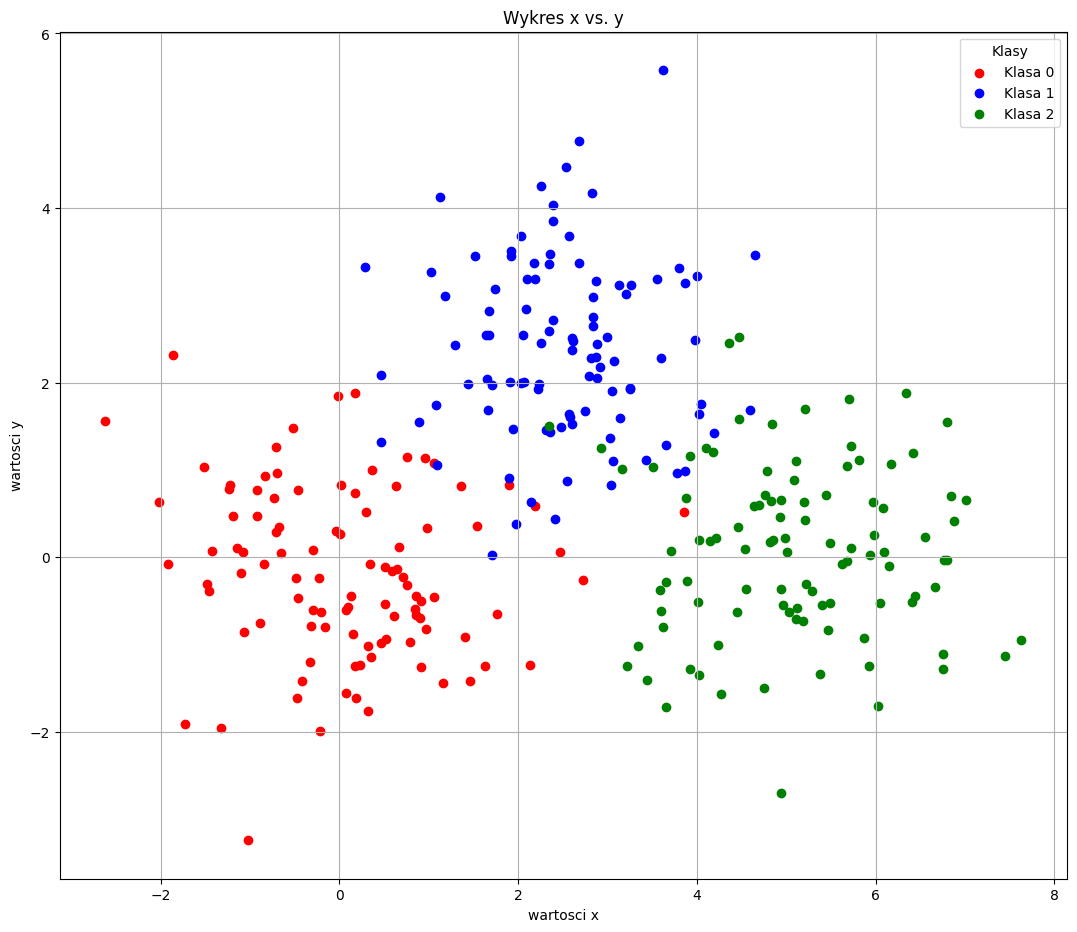

In [ ]:
x = pd.read_csv('PCA_three_clusters_data.csv')

colors = {0: 'red', 1: 'blue', 2: 'green'}

plt.figure(figsize=(13, 11))
for cls in x['class'].unique():
    subset = x[x['class'] == cls]
    plt.scatter(subset['x'], subset['y'], label=f'Klasa {cls}', color=colors[cls])

plt.legend(title="Klasy")
plt.xlabel("wartosci x")
plt.ylabel("wartosci y")
plt.title("Wykres x vs. y")
plt.grid(True)
plt.show()

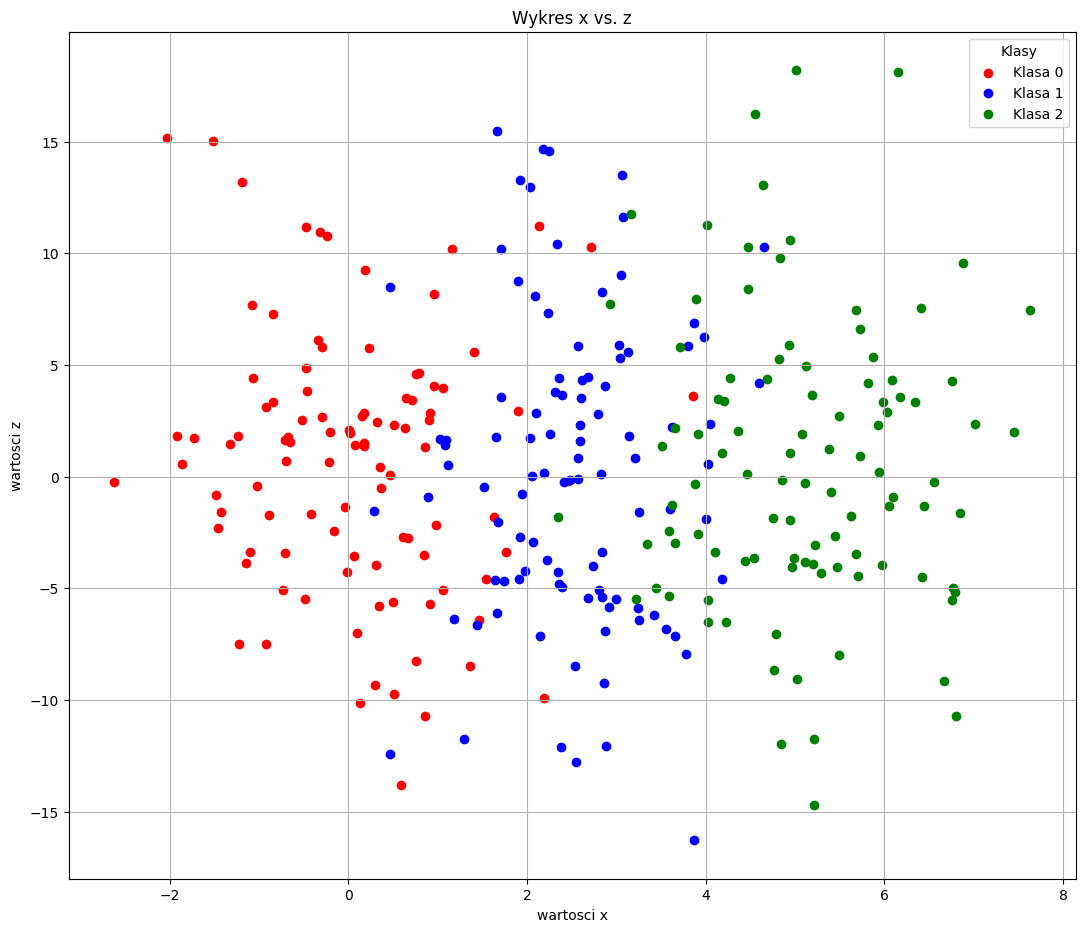

In [ ]:
plt.figure(figsize=(13, 11))
for cls in x['class'].unique():
    subset = x[x['class'] == cls]
    plt.scatter(subset['x'], subset['z'], label=f'Klasa {cls}', color=colors[cls])

plt.legend(title="Klasy")
plt.xlabel("wartosci x")
plt.ylabel("wartosci z")
plt.title("Wykres x vs. z")
plt.grid(True)
plt.show()

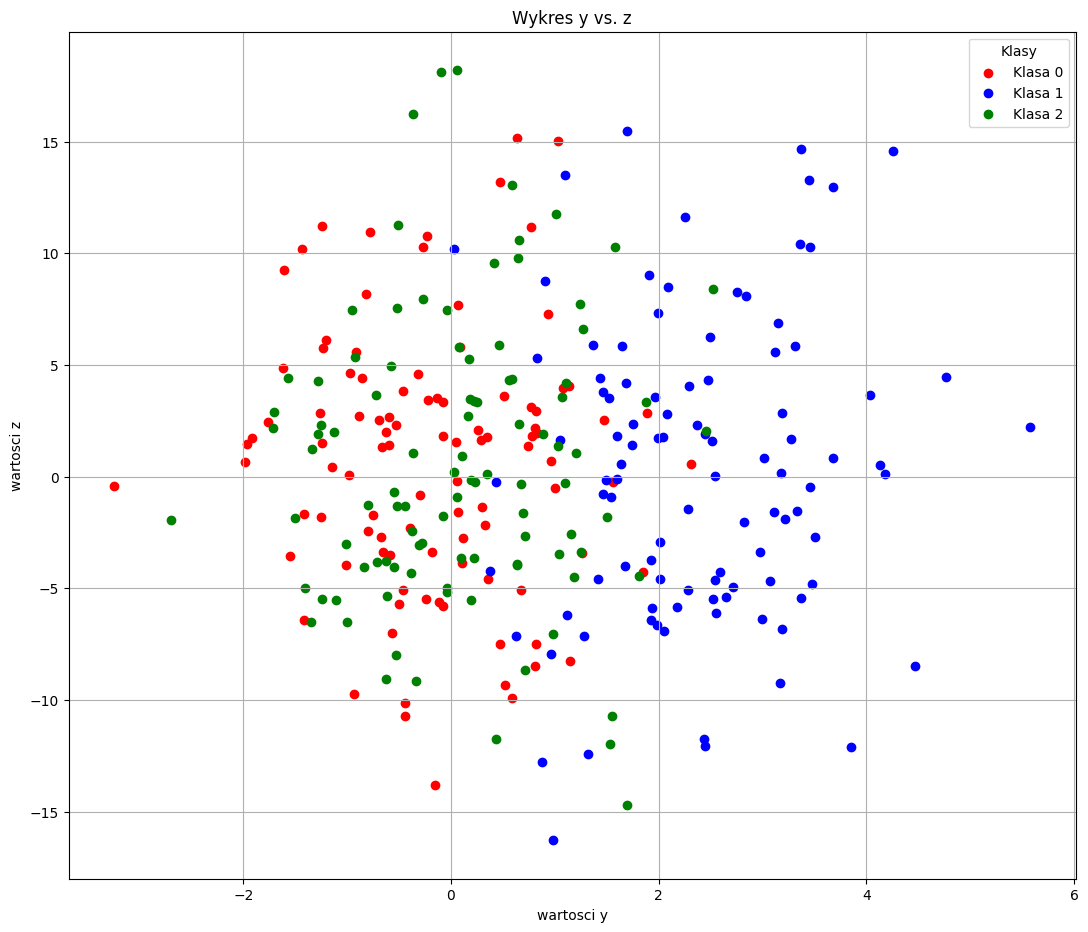

In [ ]:
plt.figure(figsize=(13, 11))
for cls in x['class'].unique():
    subset = x[x['class'] == cls]
    plt.scatter(subset['y'], subset['z'], label=f'Klasa {cls}', color=colors[cls])

plt.legend(title="Klasy")
plt.xlabel("wartosci y")
plt.ylabel("wartosci z")
plt.title("Wykres y vs. z")
plt.grid(True)
plt.show()

***Secondary question***
Why is standardization necessary before applying PCA?

Reflect on how differences in scale among features can impact the principal component directions.

**Odpowiedź:** Cechy naszych obserwacji mogą istotnie różnić się pod względem rzędu wielkości. Może to wynikać na przykład z wykonania pomiarów w różnych jednostkach. Wówczas PCA nie uwzględnia różnic w cechach które - w porównaniu do reszty - są znacznie mniejszego rzędu wielkości, a one przecież mają takie samo znaczenie dla podziału danych na klastry.


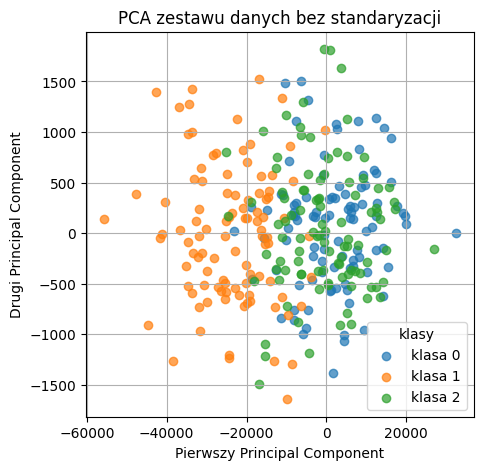

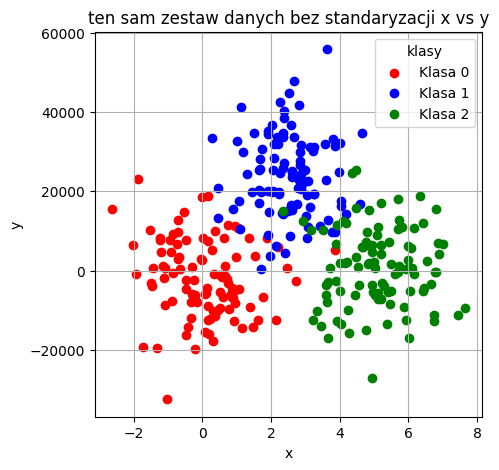

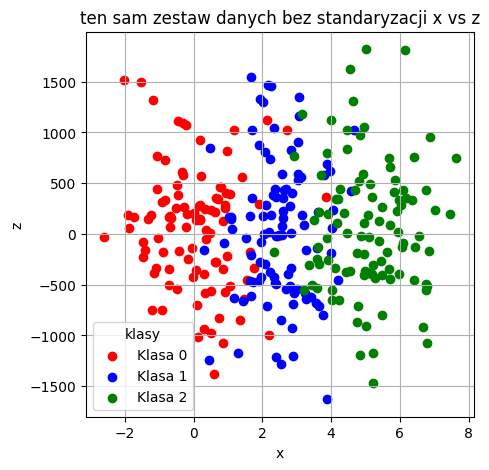

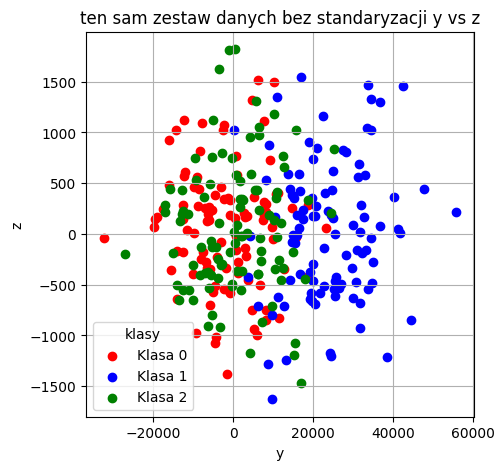

In [ ]:
data2 = pd.read_csv('PCA_three_clusters_data.csv')

y2 = data2['class']

data2['y']=10000*data2['y']
data2['z']=100*data2['z']

U, S, VT = np.linalg.svd(data2)

S_full = np.zeros((data2.shape[0], data2.shape[1]))
np.fill_diagonal(S_full, S)

XV = U @ S_full

plt.figure(figsize=(5, 5))
for i in {0,1,2}:
    plt.scatter(XV[y2 == i, 0], XV[y2 == i, 1], label=f'klasa {i}', alpha=0.7)

plt.xlabel("Pierwszy Principal Component")
plt.ylabel("Drugi Principal Component")
plt.title("PCA zestawu danych bez standaryzacji")
plt.legend(title="klasy")
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
for cls in data2['class'].unique():
    subset = data2[data2['class'] == cls]
    plt.scatter(subset['x'], subset['y'], label=f'Klasa {cls}', color=colors[cls])
plt.xlabel("x")
plt.ylabel("y")
plt.title("ten sam zestaw danych bez standaryzacji x vs y")
plt.legend(title="klasy")
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
for cls in data2['class'].unique():
    subset = data2[data2['class'] == cls]
    plt.scatter(subset['x'], subset['z'], label=f'Klasa {cls}', color=colors[cls])
plt.xlabel("x")
plt.ylabel("z")
plt.title("ten sam zestaw danych bez standaryzacji x vs z")
plt.legend(title="klasy")
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
for cls in data2['class'].unique():
    subset = data2[data2['class'] == cls]
    plt.scatter(subset['y'], subset['z'], label=f'Klasa {cls}', color=colors[cls])
plt.xlabel("y")
plt.ylabel("z")
plt.title("ten sam zestaw danych bez standaryzacji y vs z")
plt.legend(title="klasy")
plt.grid(True)
plt.show()